<a href="https://colab.research.google.com/github/tomholmes96/ca-portfolio-opti/blob/main/Buffettology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook I want to implement some of Warren Buffett's strategies for choosing stocks as detailed in the book "Buffettology". 

**Need to install Yahoo Finance as it isn't already on Colab**

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 10.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=9bad0f87dca7ca703d249c90053d5d6b33cdddb68ed3886d499f875f5af73c4f
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Basic Financials

A preview of the info provided for a stock from the yfinance API

In [ ]:
aapl = yf.Ticker('SNE')
aapl.info

{'52WeekChange': 0.40793252,
 'SandP52WeekChange': 0.17859101,
 'address1': '1-7-1 Konan',
 'address2': 'Minato-ku',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 93.4,
 'askSize': 800,
 'averageDailyVolume10Day': 937500,
 'averageVolume': 1087284,
 'averageVolume10days': 937500,
 'beta': 0.895607,
 'beta3Year': None,
 'bid': 93.38,
 'bidSize': 800,
 'bookValue': 24.082,
 'category': None,
 'circulatingSupply': None,
 'city': 'Tokyo',
 'companyOfficers': [],
 'country': 'Japan',
 'currency': 'USD',
 'dateShortInterest': 1605225600,
 'dayHigh': 93.8,
 'dayLow': 93.11,
 'dividendRate': 0.47,
 'dividendYield': 0.005,
 'earningsQuarterlyGrowth': 1.446,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': None,
 'enterpriseValue': 115164889088,
 'exDividendDate': 1585267200,
 'exchange': 'NYQ',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'expireDate': None,
 'fiftyDayAverage': 86.52515,
 'fiftyTwoWeekHi

Function for returning the rate of return for a stock factoring in how much I would pay for it:

$$ RoR = \frac{Foward EPS}{Ask Price} $$



In [ ]:
def get_ror_of_us_asset(symbol):
    stock_info = getattr(tickers.tickers, symbol).info
    #eps = stock_info['netIncomeToCommon'] / stock_info['sharesOutstanding']]
    eps = stock_info['forwardEps']
    ror = (eps / stock_info['ask']) * 100
    print('Annual Rate of Return for ' + stock_info['shortName'] + ' is: %.2f' % ror + '%')
    return ror

def get_ror_of_uk_asset(symbol):
    stock_info = yf.Ticker(symbol).info
    #eps = stock_info['netIncomeToCommon'] / stock_info['sharesOutstanding']
    eps = stock_info['forwardEps']
    ror = (eps / stock_info['ask']) * 100
    print('Annual Rate of Return for ' + stock_info['shortName'] + ' is: %.2f' % ror + '%')
    return ror

My Portfolio

In [ ]:
us_stock_symbols = ['MSFT', 'AMZN', 'AAPL', 'GOOGL', 'FB', 'NVDA', 'MCD', 'NFLX', 'PYPL', 'SQ', 
                    'TSLA', 'AU', 'GOLD', 'PAAS', 'AUY', 'SNE', 'EA', 'TTWO', 'ATVI', 'UBER', 'SPOT', 'BA', 'MA', 'V', ]
uk_stock_symbols = ['BARC.L', 'EZJ.L', 'AZN.L']
etf_symbols = ['SGLN.L', 'VWRL.L', 'VFEM.L', 'VUSA.L', 'PHSP.L']
all_symbols = us_stock_symbols + uk_stock_symbols + etf_symbols
tickers = yf.Tickers(us_stock_symbols)

For syntax reasons the UK and US stocks need to be iterated through separately.

In [ ]:
all_rors_of_assets = []
# For the US Stocks
for asset in us_stock_symbols:
    new_ror = get_ror_of_us_asset(asset)
    all_rors_of_assets += [new_ror]

# For the UK Stocks
for asset in uk_stock_symbols:
    new_ror = get_ror_of_uk_asset(asset)
    all_rors_of_assets += [new_ror]


Annual Rate of Return for Microsoft Corporation is: 3.45%
Annual Rate of Return for Amazon.com, Inc. is: 1.44%
Annual Rate of Return for Apple Inc. is: 3.47%
Annual Rate of Return for Alphabet Inc. is: 3.39%
Annual Rate of Return for Facebook, Inc. is: 3.69%
Annual Rate of Return for NVIDIA Corporation is: 2.17%
Annual Rate of Return for McDonald's Corporation is: 3.99%
Annual Rate of Return for Netflix, Inc. is: 1.77%
Annual Rate of Return for PayPal Holdings, Inc. is: 2.07%
Annual Rate of Return for Square, Inc. is: 0.53%
Annual Rate of Return for Tesla, Inc. is: 0.60%
Annual Rate of Return for AngloGold Ashanti Limited is: 14.43%
Annual Rate of Return for Barrick Gold Corporation is: 6.18%
Annual Rate of Return for Pan American Silver Corp. is: 8.06%
Annual Rate of Return for Yamana Gold Inc. is: 3.35%
Annual Rate of Return for Sony Corporation is: 4.82%
Annual Rate of Return for Electronic Arts Inc. is: 4.52%
Annual Rate of Return for Take-Two Interactive Software,  is: 3.09%
Annua

I work in dark mode so I set the graph font to white:

In [ ]:
COLOR = 'white'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


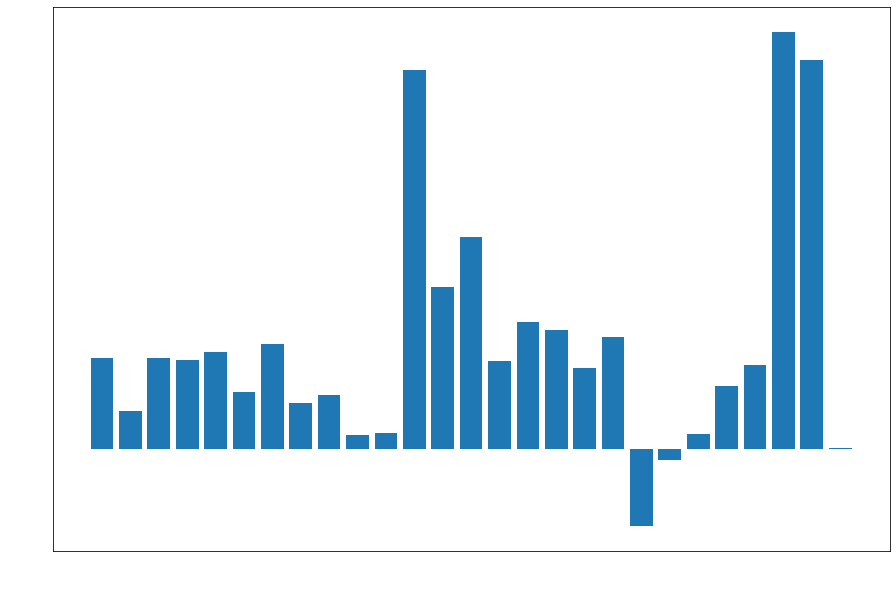

In [ ]:
plt.figure(figsize=(15,10))
plt.bar(us_stock_symbols + uk_stock_symbols, all_rors_of_assets)
ax = plt.subplot()
ax.set_xlabel('Stock')
ax.set_ylabel('Annual Rate of Return');